# Statistics Fundamentals
Here are a couple of takeaways you can expect by the end of this tutorial

- How population and sampels work
- Various sampling methods you can use

Here is the workflow we'll begin working with in this lesson
![statistics-pic-1](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-1.PNG)

In statistics, we call the set of all individuals relevant to a particular statistical question a **population**. 
We call a smaller group selected from a population a **sample**. When we select a smaller group from a population we're **sampling**.

#### Examples
Now it's our turn to play the data analyst. We collected data about the salaries of all the individuals in the company working in IT roles. Based on this data, we want to answer a series of questions. Depending on the question, our data is either a sample or a population.

Identify which is the case, and assign to the corresponding variable the string 'population' or 'sample'. Here are the questions we need to answer:

- What's the average salary of the individuals in our company working in IT roles? **population**
- What's the proportion of individuals in the IT department having salaries under 60000? **population**
- What's the minimum salary in the entire company? **sample**
- What's the minimum salary in the IT department of our company? **population**
- What's the proportion of salaries under 20000 in the entire company? **sample**

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

We can solve these problems by sampling from the population that interests us. Although it's not as good as working with the entire population, working with a sample is the next best thing.

or this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. We can see this difference as an error, and because it's the result of sampling, we call it **sampling error**.

In statistical terms, we want our samples to be **representative** of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.


### A real data set we use for sampling lesson
At this point in the lesson, we'll move from the tech company example to working with a real-world dataset. Our first challenge will be to measure sampling error using this dataset.

The dataset is about basketball players in the **WNBA** (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season. **Thomas De Jonghe** assembled this dataset, and you can download it from **Kaggle** (where you can also find useful documentation for the dataset).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset_loc = 'D:/Dataquest/Dataquest 2022 Learning/Datasets/'
wnba = pd.read_csv(dataset_loc + 'wnba.csv')

In [3]:
wnba.head()

Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0    0  
3  38  188    2    0  
4  14   50    0    0  

[5 rows x 32 columns]

In [10]:
# Use the Games Played column to find the maximum number of games played by a player in the 2016-2017 season.
parameter=wnba['Games Played'].max()
print(f'the maximum games played for population is ' + str(parameter))

# Using the DataFrame.sample() method, randomly sample 30 players from the population, and assign the result to a variable named sample.
sample = wnba['Games Played'].sample(n=30)
statistic = sample.max()
print(f'the maximum games played in a sample (n=30) is ' + str(statistic))

sampling_error = parameter - statistic
print(f'sampling error is ' + str(sampling_error))

the maximum games played for population is 32
the maximum games played in a sample (n=30) is 31
sampling error is 1


### Test 1
Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.
1. Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:

(P.S. When we use the random_state parameter, like we did in the previous exercise with Series.sample(30, random_state = 1), we make the generation of random numbers predictable. This is because Series.sample() uses a pseudorandom number generator. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state, we specify that initial value used by the pseudorandom number generator.)

2. Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

In [27]:
sample_list = []
for i in range(0,100):
    n = wnba['PTS'].sample(n=10,random_state=i+1)
    n_avg = n.mean()
    sample_list.append(n_avg)
print(len(sample_list))
sample_list[0:5]

100


[185.4, 140.4, 293.7, 172.7, 124.9]

population mean is 201.7902097902098
maximum sample is 301.4
minimum sample is 115.0
large sampling errir indicates that the sample we get isnt representative of the population


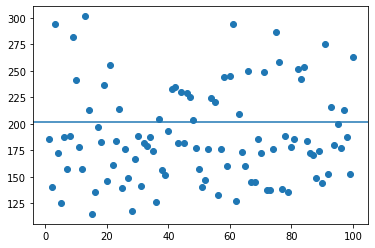

In [122]:
population_mean = wnba['PTS'].mean()
print(f'population mean is {population_mean}')
x1 = np.arange(1,101,1)
y1 = sample_list
plt.scatter(x1,y1)
plt.axhline(y=population_mean)
plt.show

print(f'maximum sample is {max(sample_list)}')
print(f'minimum sample is {min(sample_list)}')
print(f'large sampling errir indicates that the sample we get isnt representative of the population')

- Simple random sampling isn't a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.

- When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which, in turn, decreases the chances that we'll get an unrepresentative sample.

![sampling-pic-2](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-2.PNG)


- To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups and then do simple random sampling for every group. We can group our data set by **player position**, and then sample randomly from each group.

- We call this sampling method **stratified sampling**, and we call each stratified group a **stratum**.

### Test 2
Perform **stratified sampling**: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, use the sample to determine which position scores the highest number of points per game.

In [47]:
wnba[['PTS','Games Played']].head()


PTS  Games Played
0   93             8
1  217            30
2  218            26
3  188            31
4   50            24

In [48]:
wnba['PTS_per_Game'] = wnba['PTS'] / wnba['Games Played']
wnba[['PTS','Games Played','PTS_per_Game']].head()

PTS  Games Played  PTS_per_Game
0   93             8     11.625000
1  217            30      7.233333
2  218            26      8.384615
3  188            31      6.064516
4   50            24      2.083333

In [54]:
pos_mean_PTS = {}
for pos in wnba['Pos'].unique():
    pos_mean = wnba.loc[wnba['Pos'] == pos,'PTS_per_Game'].sample(n=10,random_state=1).mean()
    pos_mean_PTS[pos] = pos_mean
pos_mean_PTS

{'F': 7.662621983380605,
 'G/F': 6.4518190699836975,
 'G': 5.625274711545327,
 'C': 6.335141927038478,
 'F/C': 8.903563218390804}

In [55]:
wnba['Games Played'].value_counts(bins=3,normalize=True)

(22.0, 32.0]     0.727273
(12.0, 22.0]     0.181818
(1.969, 12.0]    0.090909
Name: Games Played, dtype: float64

- Approximately 72.7 percent of the players had more than 23 games for the 2016-2017 season, which means that this category of players who played many games probably influenced the mean. Let's take a look at the other percentages:

- When we compute the mean of the total points using the population (the entire dataset), those 72.7 percent of players who played more than 23 games will probably significantly influence the mean. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

- For instance, we might end up with a sample where only 2 percent of the players played more than 23 games. This will result in a sample mean that underestimates the population mean. Or we could have a sample where more than 95 percent of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under- or overestimation is common for small samples.

### Test 3
Perform stratified sampling on the data set 100 times, and sample strata proportionally.

1. Stratify the dataset by the number of games played in the following way: the first stratum should include players who played 12 games or fewer; the second stratum should players who played more than 12 games but up to 22 (included); the third stratum should include players who played more than 22 games (22 not included).


2. Perform stratified sampling 100 times. For each of the 100 iterations of a for loop, do the following:
   - Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum (eventually, we'll concatenate these sample observations and calculate the mean of the PTS column).
   - random_state should vary from 0 to 99: 0 for the first iteration, 99 for the final iteration.
   - Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
   - Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.


3. Display the entire sampling process.
   - Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
  - Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.

In [165]:
def sample_stratify(df,boolean_parameter,lower_bound = 0,upper_bound=0):
    stratified_df = df[(df[boolean_parameter]>lower_bound) & (df[boolean_parameter]<=upper_bound)]['PTS']
    return stratified_df

In [84]:
max_games_played = wnba['Games Played'].max()+1
stratify_matrix=np.array([[0,12],[12,22],[22,max_games_played]])
stratify_matrix

array([[ 0, 12],
       [12, 22],
       [22, 33]])

In [167]:
# game_played_series = wnba['Games Played'].to_numpy().copy()
wnba_copy = wnba.copy()
stratified_df_list = []
for i in stratify_matrix:
    l_bound = i[0]
    u_bound = i[1]
    stratified_df = sample_stratify(wnba_copy,'Games Played',l_bound,u_bound)
    stratified_df_list.append(stratified_df)
stratified_df_list

[0       93
 1      217
 2      218
 3      188
 4       50
       ... 
 138    467
 139     28
 140    277
 141    582
 142    151
 Name: PTS, Length: 143, dtype: int64,
 Series([], Name: PTS, dtype: int64),
 Series([], Name: PTS, dtype: int64)]

In [117]:
samples_list = []
mean_list = []
for i in range(0,100):
    samples1 = stratified_df_list[0].sample(n=1,random_state=i)
    samples2 = stratified_df_list[1].sample(n=2,random_state=i)
    samples3 = stratified_df_list[2].sample(n=7,random_state=i)
    samples = pd.concat([samples1,samples2,samples3])
    samples_list.append(samples)
    mean_list.append(samples.mean())
    

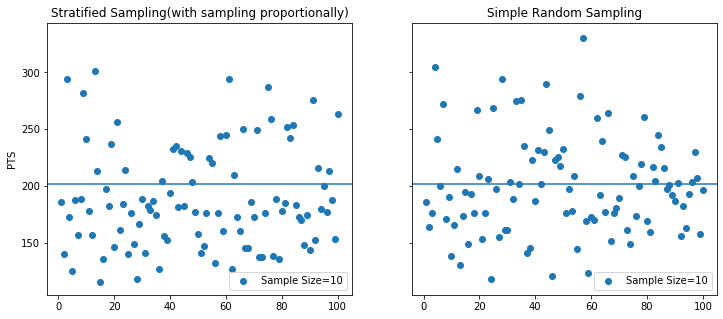

In [152]:
y2=mean_list
x2=np.arange(1,101,1)

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,5))

ax1.scatter(x1,y1,label='Sample Size=10')
ax1.axhline(population_mean)
ax1.set_title('Stratified Sampling(with sampling proportionally)')
ax1.legend(loc='lower right',fontsize=10)
ax1.set_ylabel('PTS')

ax2.scatter(x2,y2,label='Sample Size=10')
ax2.axhline(population_mean)
ax2.set_title('Simple Random Sampling')
ax2.legend(loc='lower right',fontsize=10)
# plt.scatter(x,y)
# plt.axhline(y=population_mean)
plt.show()


- You might not have been impressed by the results we got by sampling proportionally. The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling:

- The poor performance is a result of choosing bad strata. We stratified the data by the number of games played, but this isn't a good approach. A player has technically played one game even if she only played for one or two minutes, even though others play 30 or 40 minutes, and it still only qualifies as one game.

- It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

### Test 4 
Let's try to stratify the data by number of minutes played
1. Stratify the dataset by the number of minutes played in the following way: the first stratum should include players who played 350 minutes or fewer; the second stratum should players who played more than 350 minutes but up to 683 minutes (included); the third stratum should include players who played more than 683 minutes.
2. Increase sample size from 10 to 12 for each iteration, and choose 4 sample observations in each stratum
3. Perform the same sampling technique to plot mean PTS distribution

In [163]:
wnba['MIN'].value_counts(bins=3,normalize=True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

In [169]:
max_mins_played = wnba['MIN'].max()+1
stratify_matrix=np.array([[0,350],[350,683],[683,max_mins_played]])
stratify_matrix

array([[   0,  350],
       [ 350,  683],
       [ 683, 1019]])

In [170]:
# game_played_series = wnba['Games Played'].to_numpy().copy()
wnba_copy = wnba.copy()
stratified_df_list = []
for i in stratify_matrix:
    l_bound = i[0]
    u_bound = i[1]
    stratified_df = sample_stratify(wnba_copy,'MIN',l_bound,u_bound)
    stratified_df_list.append(stratified_df)
stratified_df_list

[0       93
 4       50
 5       26
 6       24
 9       36
 12      51
 13      41
 14       8
 15      58
 16      31
 17      19
 18       7
 23      44
 24      26
 31      54
 34      87
 35      17
 36      70
 41      49
 50      88
 54      13
 56       9
 63      70
 64      12
 65      22
 70      77
 73      65
 77      32
 84       6
 87      48
 89     119
 90       3
 91       6
 93      73
 96      91
 100    116
 101     96
 102     48
 107     96
 109     78
 115      2
 116     87
 118     81
 119     96
 121     66
 123    158
 129     72
 130     55
 134     17
 139     28
 Name: PTS, dtype: int64, 2      218
 20     217
 21     235
 22     238
 25     461
 30     250
 32     100
 37     255
 40     254
 42     209
 43     253
 45     376
 47     128
 48     252
 49     259
 52     159
 53     102
 57     127
 59     245
 60     200
 62     142
 68     116
 71     185
 72     161
 75     171
 78     207
 79     225
 80     134
 81     141
 86     233
 88     177
 92

In [174]:
samples_list = []
mean_list = []
for i in range(0,100):
    samples1 = stratified_df_list[0].sample(n=4,random_state=i)
    samples2 = stratified_df_list[1].sample(n=4,random_state=i)
    samples3 = stratified_df_list[2].sample(n=4,random_state=i)
    samples = pd.concat([samples1,samples2,samples3])
    samples_list.append(samples)
    mean_list.append(samples.mean())

In [175]:
mean_list

[230.25,
 240.08333333333334,
 201.41666666666666,
 219.16666666666666,
 207.33333333333334,
 182.91666666666666,
 208.0,
 217.41666666666666,
 210.25,
 177.5,
 192.58333333333334,
 184.58333333333334,
 225.25,
 187.66666666666666,
 241.58333333333334,
 235.0,
 205.75,
 207.33333333333334,
 182.66666666666666,
 187.75,
 189.75,
 223.25,
 225.25,
 210.91666666666666,
 234.41666666666666,
 216.58333333333334,
 225.08333333333334,
 264.5833333333333,
 215.5,
 178.5,
 207.08333333333334,
 168.66666666666666,
 210.16666666666666,
 209.83333333333334,
 191.66666666666666,
 179.83333333333334,
 196.16666666666666,
 191.5,
 222.5,
 179.58333333333334,
 241.75,
 240.83333333333334,
 205.0,
 177.75,
 232.08333333333334,
 194.66666666666666,
 226.83333333333334,
 215.25,
 256.5,
 231.58333333333334,
 215.08333333333334,
 204.33333333333334,
 243.08333333333334,
 206.66666666666666,
 201.0,
 199.08333333333334,
 221.41666666666666,
 203.66666666666666,
 210.33333333333334,
 159.08333333333334,
 22

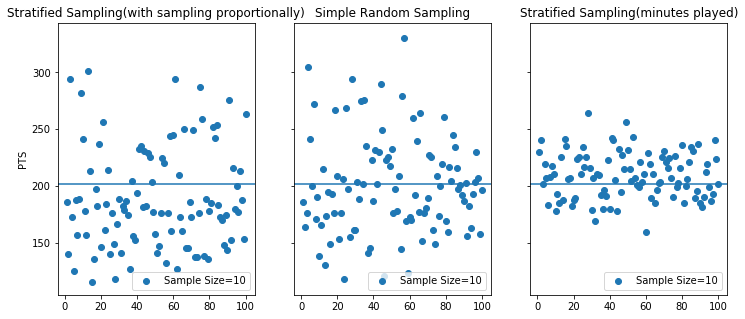

In [176]:
y3=mean_list
x3=np.arange(1,101,1)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,5))

ax1.scatter(x1,y1,label='Sample Size=10')
ax1.axhline(population_mean)
ax1.set_title('Stratified Sampling(with sampling proportionally)')
ax1.legend(loc='lower right',fontsize=10)
ax1.set_ylabel('PTS')

ax2.scatter(x2,y2,label='Sample Size=10')
ax2.axhline(population_mean)
ax2.set_title('Simple Random Sampling')
ax2.legend(loc='lower right',fontsize=10)

ax3.scatter(x3,y3,label='Sample Size=10')
ax3.axhline(population_mean)
ax3.set_title('Stratified Sampling(minutes played)')
ax3.legend(loc='lower right',fontsize=10)
# plt.scatter(x,y)
# plt.axhline(y=population_mean)
plt.show()

Here are a few guidelines for choosing good strata:

1. Minimize the variability within each stratum.

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need more granular stratification (you need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

2. Maximize the variability between strata.

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or you might need to change the stratification criterion. On the previous screen, stratifying the data by games played resulted in strata that were similar to each other regarding the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

3. The stratification criterion should correlate strongly with the property you're trying to measure.

For instance, the column describing minutes played (the criterion) should be correlate strongly with the number of total points (property we want to measure).

We've left the code editor open for you to experiment with the different sampling methods we've learned so far. One thing you can try is to replicate the last graph above. You can then play with sample sizes and try to get insights into how variability and sampling error change.

### Finally, we introduce Cluster Sampling

- The dataset we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each of which requires its own scraping script.


- This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are many websites that can help with data collection, but how can you go about it so that you can spend a day or two on getting the data you need, rather than a month or two?


- One way is to list all the data sources you can find, and then randomly pick only a few of them from which to collect. Then you can individually sample each of the sources you've randomly picked. We call this sampling method cluster sampling, and we call each of the individual data sources a cluster.

In [177]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       R
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: object